### Using TensorFlow to solve a Linear Regression problem
y = weight * x + bias

This is from https://github.com/dhirajk100/LRTF2/blob/master/LR%20with%20TF%20%20Dhiraj.ipynb

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
# actual weight = 2 and actual bias = -1.0
x = np.linspace(0, 3, 120)
y = 2 * x - 1.0 + np.random.randn(*x.shape) * 0.3

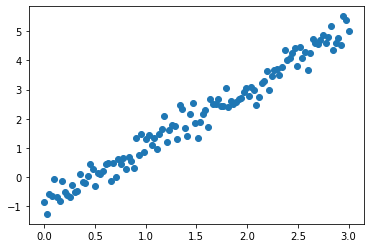

In [17]:
plt.scatter(x,y, label="input data set")

In [18]:
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

In [19]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

def train_step(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [20]:
linear_model = LinearModel()
Weights, Biases = [], []
epochs = 80
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train_step(linear_model, x, y, lr=0.12)
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 760.9461059570312
Epoch count 1: Loss value: 14.839351654052734
Epoch count 2: Loss value: 8.58452033996582
Epoch count 3: Loss value: 7.753866672515869
Epoch count 4: Loss value: 7.035988807678223
Epoch count 5: Loss value: 6.38563346862793
Epoch count 6: Loss value: 5.79622220993042
Epoch count 7: Loss value: 5.262044429779053
Epoch count 8: Loss value: 4.777921199798584
Epoch count 9: Loss value: 4.339163303375244
Epoch count 10: Loss value: 3.9415206909179688
Epoch count 11: Loss value: 3.58113956451416
Epoch count 12: Loss value: 3.254528760910034
Epoch count 13: Loss value: 2.9585230350494385
Epoch count 14: Loss value: 2.690255641937256
Epoch count 15: Loss value: 2.4471261501312256
Epoch count 16: Loss value: 2.2267799377441406
Epoch count 17: Loss value: 2.0270814895629883
Epoch count 18: Loss value: 1.846096158027649
Epoch count 19: Loss value: 1.6820701360702515
Epoch count 20: Loss value: 1.5334144830703735
Epoch count 21: Loss value: 1.3986889123

In [21]:
linear_model.Weight.numpy(), linear_model.Bias.numpy()

(1.9286011, -0.8068646)

In [22]:
RMSE = loss(y, linear_model(x))

In [23]:
RMSE.numpy()

0.099601604